<a href="https://colab.research.google.com/github/Szymoniakfoltynson/ai-course-friday/blob/main/Titanic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset('titanic')

In [4]:
#kategoryzacja opłat za bilety

min_fare = df["fare"].min()
max_fare = df["fare"].max()
fare_step = (max_fare - min_fare) / 3

fare_ranges = [min_fare + fare_step, min_fare + 2 * fare_step] # Fixed: to correctly define two range boundaries
print(f"Niska ({min_fare:.2f} - {fare_ranges[0]:.2f})") # Fixed: f-string formatting and added closing parenthesis
print(f"Średnia ({fare_ranges[0]:.2f} - {fare_ranges[1]:.2f})") # Added a closing parenthesis for consistency
print(f"Wysoka ({fare_ranges[1]:.2f} - {max_fare:.2f})") # Added a closing parenthesis for consistency

print(df.shape)
df.head(10)

Niska (0.00 - 170.78)
Średnia (170.78 - 341.55)
Wysoka (341.55 - 512.33)
(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
# sex and age
def classify_fare(price, ranges):
    if price < ranges[0]:
        return 0
    elif price <= ranges[1]:
        return 1
    else:
        return 2

selected_features = ["sex", "pclass", "age", "fare_category", "survived"] # Fixed variable name and added 'survived'
df["fare_category"] = df["fare"].map(lambda x: classify_fare(x, fare_ranges)) # Fixed .map() call

df_model = df[selected_features].copy() # Fixed typo and called .copy() as a method
df_model.head()
df_model["sex"] = df_model["sex"].map({"male": 0, "female": 1})
df_model.head()

,sex,pclass,age,fare_category,survived
0,0,3,22.0,0,0
1,1,1,38.0,0,1
2,1,3,26.0,0,1
3,1,1,35.0,0,1
4,0,3,35.0,0,0


In [10]:
from sklearn.preprocessing import StandardScaler

x = df_model[selected_features]
y = df_model["survived"]

x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(X_test)

(array([[  0., 467., 245.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [163., 151., 398.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [111., 308., 122.,  29.,   2.,   0.,   0.,   0.,   0.,   0.],
        [  0., 695.,   0.,   0.,   0.,  14.,   0.,   0.,   0.,   3.],
        [444.,   0., 268.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([-2.00718482, -0.76322713,  0.48073057,  1.72468826,  2.96864596,
         4.21260366,  5.45656135,  6.70051905,  7.94447674,  9.18843444,
        10.43239213]),
 <a list of 5 BarContainer objects>)

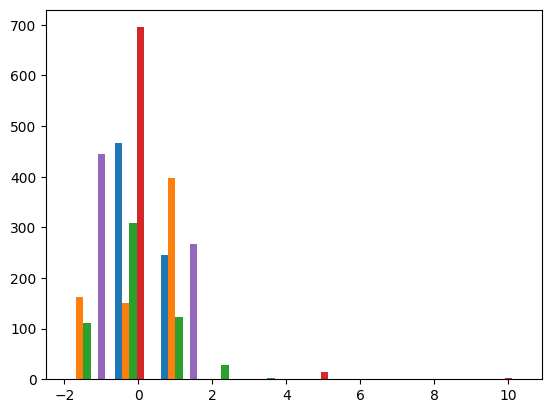

In [13]:
plt.hist(x_train_scaled)